## Firstly, we will take the input image on whixh we have to work. After which, we will mark the 4 coordinates of the page, notebook or any object that we have to scan.

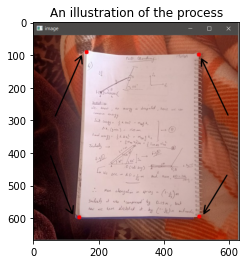

In [14]:
import cv2 
from skimage import io, img_as_float
from matplotlib import pyplot as plt
from skimage.io import imread, imshow
from skimage import transform


yc=[]          # these are just 2 arrays 
xc=[]          # to store the values of the coordinates that we want to record, when we click on the image

def click_event1(event, x, y, flags, params):  
    if event == cv2.EVENT_LBUTTONDOWN: 
        
        font = cv2.FONT_HERSHEY_SIMPLEX 
        cv2.circle(img,(x,y),5,(0,0,255),-1) 
        cv2.imshow('image', img)
        xc.append(x)
        yc.append(y)
        

 
img = cv2.imread('sheet1.jpg', 1)  
cv2.imshow('image', img) 
cv2.setMouseCallback('image', click_event1) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

scanning1 = img_as_float(io.imread("Scanning1.png"))

plt.title("An illustration of the process")
plt.imshow(scanning1)
plt.show()



## Then we specify the top-left and the bottom-right coordinate of the rectangle to which we want our image to fit into.

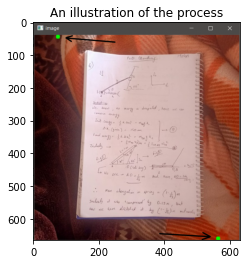

In [15]:
def click_event2(event, x, y, flags, params):  
    if event == cv2.EVENT_LBUTTONDOWN: 
        
        font = cv2.FONT_HERSHEY_SIMPLEX 
        cv2.circle(img,(x,y),5,(0,255,0),-1) 
        cv2.imshow('image', img)
        xc.append(x)
        yc.append(y)
        

 
img = cv2.imread('sheet1.jpg', 1)  
cv2.imshow('image', img) 
cv2.setMouseCallback('image', click_event2) 
cv2.waitKey(0) 
cv2.destroyAllWindows() 

scanning2 = img_as_float(io.imread("Scanning2.png"))

plt.title("An illustration of the process")
plt.imshow(scanning2)
plt.show()

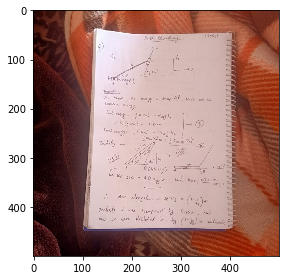

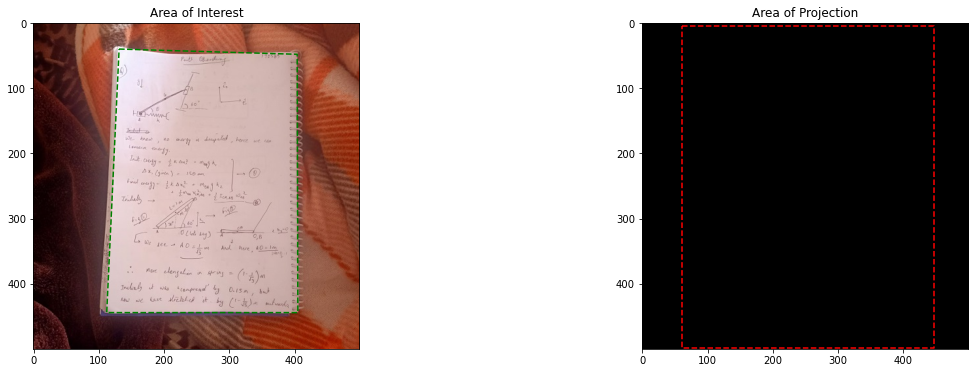

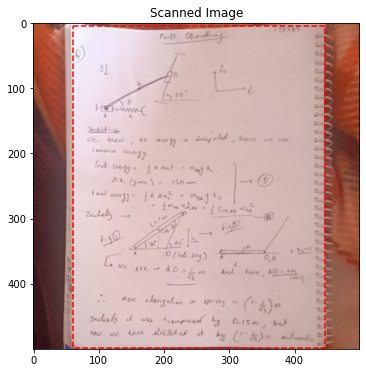

In [17]:

img = imread('sheet1.jpg')
imshow(img);

area_of_interest = [
( xc[0] , yc[0] ),
( xc[1] , yc[1] ),
( xc[2] , yc[2] ),
( xc[3] , yc[3] )]
area_of_projection = [( xc[4] , yc[4] ),
( xc[5] , yc[4] ),
( xc[5] , yc[5] ),
( xc[4] , yc[5] )]

def project_planes(image, src, dst):
    x_src = [val[0] for val in src] + [src[0][0]]
    y_src = [val[1] for val in src] + [src[0][1]]
    x_dst = [val[0] for val in dst] + [dst[0][0]]
    y_dst = [val[1] for val in dst] + [dst[0][1]]
    
    fig, ax = plt.subplots(1,2, figsize=(20,6))
    
    new_image = image.copy() 
    projection = np.zeros_like(new_image)
    ax[0].imshow(new_image);
    ax[0].plot(x_src, y_src, 'g--')
    ax[0].set_title('Area of Interest')
    ax[1].imshow(projection)
    ax[1].plot(x_dst, y_dst, 'r--')
    ax[1].set_title('Area of Projection')
    
project_planes(img, area_of_interest, area_of_projection)

def project_transform(image, src, dst):
    x_dst = [val[0] for val in dst] + [dst[0][0]]
    y_dst = [val[1] for val in dst] + [dst[0][1]]
    
    tform = transform.estimate_transform('projective', 
                                         np.array(src), 
                                         np.array(dst))
    transformed = transform.warp(image, tform.inverse)
    
    plt.figure(figsize=(6,6))
    plt.title("Scanned Image")
    plt.imshow(transformed)
    plt.plot(x_dst, y_dst, 'r--')
    
project_transform(img, area_of_interest, area_of_projection)

## We can see in the images above, that we finally have our scanned image ready, as per according to the coordinates we wanted it to fit.